# Electrical circuit

Consider a circuit with a voltage source $u_{in}(t)$, a resistor
$$ u_{R}(t) = R ~ i(t) $$
with $ R > 0$, an inductor 
$$ u_{L}(t) = L ~ \frac{d i(t)}{dt} $$
with $L > 0$, and a capacitor 
$$ u_{C}(t) = \frac{1}{C} ~ \int i(\tau) ~ d\tau $$ 
with $C > 0$ at the output. The components are connected serial as portrayed in the figure below and one holds 

$$ u_{in}(t) = u_{R}(t) + u_{L}(t) + u_{C}(t) \text{.} \label{eq:el_circ} \tag{1} $$

Equation $\eqref{eq:el_circ}$ is noted in terms of output $ u_{C} $ with $ i(t) = C ~ \dot{u}_{C}(t) $
as

$$ u_{in}(t) = R ~ C ~ \dot{u}_{C}(t) + L ~ C ~ \ddot{u}_{C}(t) + u_{C}(t)  \text{.} \label{eq:el_circ_2_ord_sys} \tag{2}  $$

The second order differential equation $\eqref{eq:el_circ_2_ord_sys}$ can be noted as a first order system 

$$
\begin{pmatrix}
\dot{x}_{1}(t) \\
\dot{x}_{2}(t)
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
- \frac{1}{L C} & - \frac{R}{L}
\end{pmatrix}
\begin{pmatrix}
x_{1}(t) \\
x_{2}(t)
\end{pmatrix}
+
\begin{pmatrix}
0 \\
\frac{K}{L C}
\end{pmatrix}
u(t)
$$

with $x_{1}(t) = u_{C}(t)$, $x_{2}(t) = \dot{u}_{C}(t)$ and $u_{in}(t) = K ~ u(t)$. This electrical oscillator works analog to the mechanical oscillator and can be simulated as discussed before.

Otherwise, Equation $\eqref{eq:el_circ_2_ord_sys}$ can be noted with the Laplace transform (see [Wikipedia](https://en.wikipedia.org/wiki/Laplace_transform)) in the frequency domain as

$$
U_{in}(s) = s ~ R ~ C ~ U_{c}(s) + s^2 ~ L ~ C ~ U_{c}(s) + U_{c}(s) = \left[ s^2 ~ L C + s ~ R C + 1 \right] U_{C}(s)
$$
and rewritten as the transfer function
$$
G(s) = \frac{Y(s)}{U(s)} = \frac{K}{s^2 ~ L C + s ~ R C + 1} = \frac{K}{s^2 ~ T_{1}^2 + s ~ T_{2} + 1}
$$

with $U_{in}(s) = K ~ U(s)$ (U is called input), $U_{C}(s) = Y(s)$ (Y is called output), $T_{1} = \sqrt{L C}$ and $T_{2} = R C$. 

Using the transfer function $G$ the behaviour of output $Y$ can be tested for steps and impulses at the input $U$ - so called step and impulse responses. 

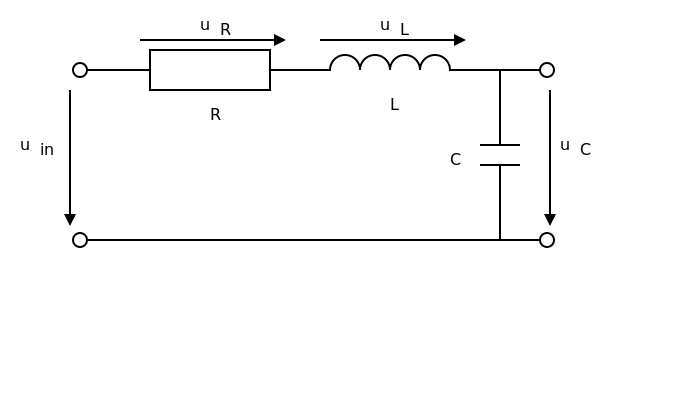

In [1]:
el_net = """
<svg height="410" width="700">
    <style>
    .small { font: 13px sans-serif; }
    .heavy { font: 30px sans-serif; }

    /* Note that the color of the text is set with the    *
     * fill property, the color property is for HTML only */
    .Rrrrr { font: italic 40px serif; fill: red; }
  </style>
    <defs>
    <!-- arrowhead marker definition -->
    <marker id="arrow" viewBox="0 0 10 10" refX="5" refY="5"
        markerWidth="6" markerHeight="6"
        orient="auto-start-reverse">
      <path d="M 0 0 L 10 5 L 0 10 z" />
    </marker>
    </defs>
    <!-- Resistor  -->
    <circle cx="80" cy="70" r="7" stroke="black" stroke-width="2" fill="transparent" />
    <line x1="87" y1="70" x2="150" y2="70" style="stroke:rgb(0,0,0);stroke-width:2" />
   <rect x="150" y="50" width="120" height="40" style="fill:rgb(255,255,255);stroke-width:2;stroke:rgb(0,0,0)" /> 
    <text x="210" y="120" class="heavy">R</text>
    <!-- Inductor  -->
    <path d="M 270 70 
            L 330 70 
            A 15 15 0 1 1 360 70
            A 15 15 0 1 1 390 70
            A 15 15 0 1 1 420 70
            A 15 15 0 1 1 450 70
            L 540 70" stroke="black" fill="transparent" stroke-width="2"/>
    <text x="390" y="110" class="heavy">L</text>
    <circle cx="547" cy="70" r="7" stroke="black" stroke-width="2" fill="transparent" />
    <!-- Capacitor  -->
    <line x1="500" y1="70" x2="500" y2="145" style="stroke:rgb(0,0,0);stroke-width:2" />
    <line x1="500" y1="165" x2="500" y2="240" style="stroke:rgb(0,0,0);stroke-width:2" />
    <line x1="480" y1="145" x2="520" y2="145" style="stroke:rgb(0,0,0);stroke-width:2" />
    <line x1="480" y1="165" x2="520" y2="165" style="stroke:rgb(0,0,0);stroke-width:2" />
    <text x="450" y="165" class="heavy">C</text>
    <!-- Zero line  -->
    <circle cx="80" cy="240" r="7" stroke="black" stroke-width="2" fill="transparent" />
    <line x1="87" y1="240" x2="540" y2="240" style="stroke:rgb(0,0,0);stroke-width:2" />
    <circle cx="547" cy="240" r="7" stroke="black" stroke-width="2" fill="transparent" />
    <!-- Voltage -->
    <line x1="70" y1="90" x2="70" y2="220" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
    <line x1="550" y1="90" x2="550" y2="220" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
    <text x="20" y="150" class="heavy">u</text> 
    <text x="40" y="155" class="small">in</text> 
    <text x="560" y="150" class="heavy">u</text> 
    <text x="580" y="155" class="small">C</text> 
    <line x1="140" y1="40" x2="280" y2="40" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
    <text x="200" y="30" class="heavy">u</text> 
    <text x="220" y="35" class="small">R</text> 
    <line x1="320" y1="40" x2="460" y2="40" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
    <text x="380" y="30" class="heavy">u</text> 
    <text x="400" y="35" class="small">L</text> 
</svg> 
"""
display("image/svg+xml", el_net)

## Step and impulse response

Both responses can be explained by a simple electrical circuit with a resistor and capacitor (RC oscillator) without inductor. So, induction $L = 0$ and one holds 
$$ u_{in}(t) = R C ~ \dot{u}_{C}(t) + u_{C} $$

or rewritten with $y(t) = u_{C}$, $u(t) = u_{in}$ and $a = 1/(R C)$ as a linear ODE

$$ \dot{y}(t) = -a ~ y(t) + a ~ u(t) \text{.} \label{eq:1_order_rc} \tag{3} $$

### Impulse response

If input $u(t)$ is an impulse, for example 

$$u(t) = \delta(t) = \begin{cases} 1 \quad \text{for} \quad t = 0 \\ 0 \quad \text{else}\end{cases}$$ 

then one yields an impulse response $g(t)$ as the behaviour of the output $y(t) = g(t)$. One can assume for the simple ODE $\eqref{eq:1_order_rc}$ that $u(t) = 0$ and $y(0) = 1 \cdot a$ and thus 
$$y(t) = g(t) = a ~ exp(-a ~t) \text{.}$$

The resulting graph is plotted below.

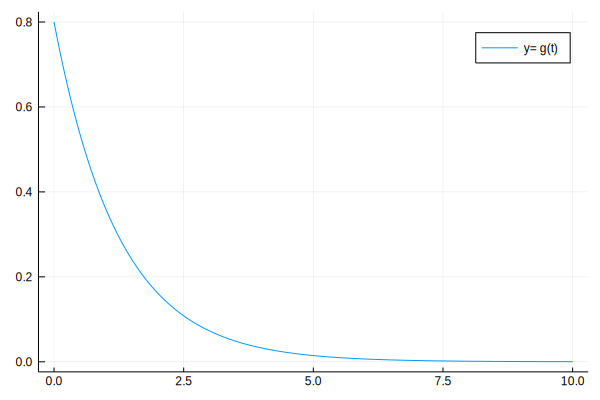

In [2]:
a = 0.8;
t = 0.0 : 0.01 : 10; # Time range

using Plots
plot(t, t -> a * exp(-a*t), label="y= g(t)")

### Step response

If input $u(t)$ is a step, for example $u(t) = 1 ~ \text{for} ~ t \geq 0$, then one yields an step response $h(t)$ as the behaviour of the output $y(t) = h(t)$. 

The linear ODE $\dot{y}(t) = -a ~ \left[ y(t) - 1 \right] $ with the initial value $y(t = 0) = x_{0} = 0$ is solved via integration as

$$ \ln\left( \frac{y - 1}{y_{0} - 1} \right) = -a ~ t $$
and further
$$ y(t) = 1 + [x_{0} - 1] ~ \exp(-a ~ t) = 1 - \exp(-a ~ t) = h(t) \text{.} $$

One observes, that $g(t) = a ~ \exp(-a ~ t) = \frac{d}{dt} h(t)$. This holds in general, too, and leads with the Laplace transform in the frequency domain to $G(s) = s ~ H(s)$.

The resulting graphs for the impulse $y(t) = g(t)$ and step response $y(t) = h(t)$ are plotted below.

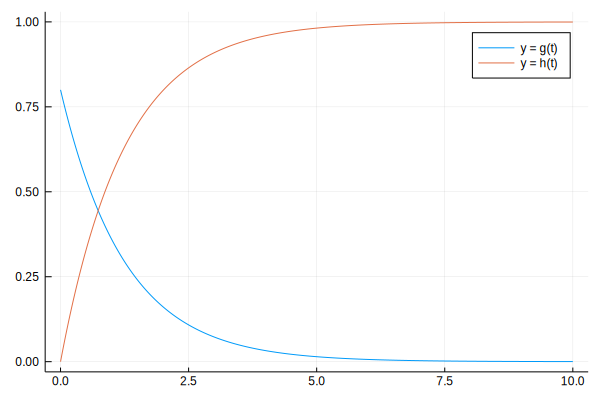

In [3]:
a = 0.8;
t = 0.0 : 0.01 : 10; # Time range

using Plots
plot(t, [t -> a*exp(-a*t), t-> 1-exp(-a*t)], label=["y = g(t)" "y = h(t)"])

## Dynamics of the electrical oscillator

The transfer function of the electrical oscillator is given as

$$
G(s) = \frac{Y(s)}{U(s)} = \frac{K}{s^2 ~ T_{1}^2 + s ~ T_{2} + 1} = \frac{K \omega_{1}^2 }{s^2  +  \omega_{2} ~ s + \omega_{1}^2}
$$

with $ \omega_{1} = T_{1}^{-1}$, $ \omega_{2} = T_{2}/T_{1}^{2}$ and the output can be calculated with $Y(s) = G(s) ~ U(s)$.

### Stability

The transfer function $G(s)$ is called bounded-input-bounded-output (BIBO) stable if and only if the real part of all poles are smaller than zero. 

Thus, the denominator is studied for
$$ s^2  + \omega_{2} ~ s + \omega_{1}^2 = 0 $$
and this leads to 
$$ s_{1,2} = \frac{-\omega_{2}}{2} \pm \frac{1}{2} \sqrt{\omega_{2}^2 - 4 \omega_{1}^2} \text{.} $$

Therefore, if $\omega_{1} > 0$ and $\omega_{2} > 0$ than the transfer function $G(s)$ is BIBO stable. This condition is equal to the stability proof with eigenvalues in the state space representation. 

### Impulse response

The impulse $u(t) = \delta(t)$ is Laplace transformed to $U(s) = 1$ and thus $Y(s) = G(s) ~ U(s) = G(s)$. The output in the time domain can be either derived by partial fraction decomposition and inverse Laplace transform or simulated with specific software libraries.




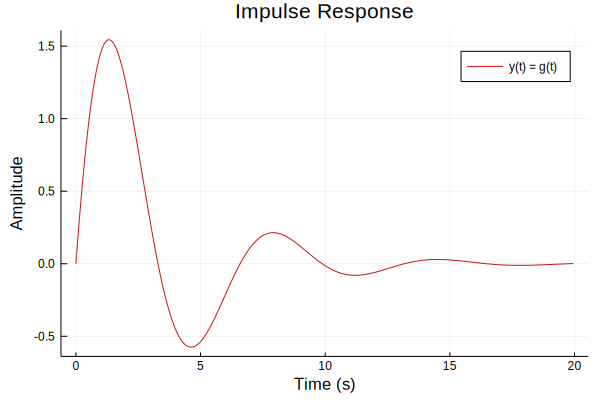

In [4]:
T₁ = 1.0;
T₂ = 0.6;
K = 2.3; # Gain or amplification
Tf = 20; # Final time for simulation

using ControlSystems
G = tf([K], [T₁^2, T₂, 1])
impulseplot(G, Tf, label="y(t) = g(t)")

### Step response

The step response $y(t) = h(t) = \int g(\tau) d\tau$ is Laplace transformed to $Y(s) = H(s) = \frac{1}{s} G(s)$. Thus, the input in the frequency domain is given as $U(s) = \frac{1}{s}$ and one yields 
$$
Y(s) = G(s) ~ U(s) ~=~ \frac{K \omega_{1}^2 }{s^3  +  \omega_{2} ~ s^2 + \omega_{1}^2 ~ s} \text{.}
$$

The step response can be calculated in the time domain either analytically or numerically analog to the impulse response.

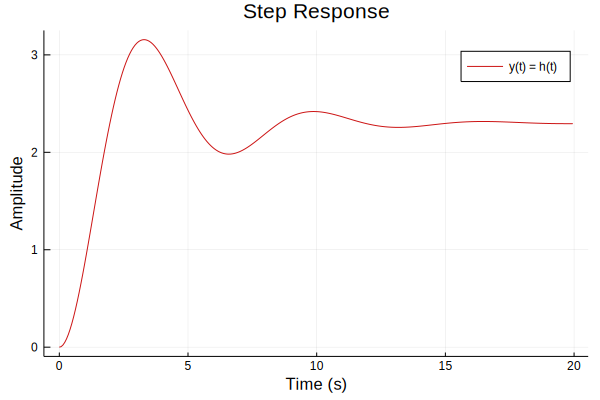

In [5]:
stepplot(G, Tf, label="y(t) = h(t)")